In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
style.use('tableau-colorblind10')
sns.set_palette("viridis")



# Question 3 - hypothesis test
hypothesis test: Does new mayor Karen Bass affect decrease crime on streets where she lives?<br> 
$H_0$ - There is no significant difference in the proportion of crimes in the two stations closest to Karen Bass's house before and after her election compared to other areas. <br>
$H_1$ - There is a significant difference in the proportion of crimes in the two stations closest to Karen Bass's house before and after her election compared to other areas.  <br>
<br>

This question made me interesting from couple of reasons: <br>
1. Leaders often says "no more crime on the streets!" which sound good on election speech but do they really having any impact on the subject? <br>
2. On April 23th, 2024 there was a burglary in Karen's house, which made me think if the crime rate on the streets decreased afterward. <br>
3. Do mayor's decrease crime only in their area or in the whole city? <br>


In [2]:
# Load the data
path = r'C:\Users\Gali\Desktop\Technion\Semester_2\DataScience\Project\archive\crime_in_la.csv'
crime_data = pd.read_csv(path)
crime_data

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,190326475,01/03/2020,21:30,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,O,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,08/02/2020,18:00,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,04/11/2020,17:00,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,10/03/2020,20:37,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,17/08/2020,12:00,6,Hollywood,666,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,242106032,17/02/2024,23:30,21,Topanga,2103,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0385,44,F,O,DRIVEWAY,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,22700 NAPA ST,34.2260,-118.6214
963002,242004546,16/01/2024,15:10,20,Olympic,2013,624,BATTERY - SIMPLE ASSAULT,2047 0400 0429 0444 1202 1822,80,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,34.0690,-118.3054
963003,240104953,15/01/2024,01:00,1,Central,101,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,34.0685,-118.2460
963004,241711348,19/07/2024,07:57,17,Devonshire,1751,888,TRESPASSING,1501,0,X,X,MTA - ORANGE LINE - CHATSWORTH,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990


In [3]:
# Convert the date to datetime and clean year 2024 from the data
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], errors='coerce')
crime_data = crime_data[(crime_data['DATE OCC'] >= '01/01/2020') & (crime_data['DATE OCC'] <= '31/12/2023')]

# upload photo
This is the map of all 21 LA police stations. <br> 
The white circle is the location of Karen Bass's house. <br>
The two closest stations to Karen Bass's house are Wilshire and Olympic. <br> 
<br>
![Police_stations.png](Police_stations.png) <br>



In [4]:
# Test statistic 
Karen_elected = pd.to_datetime('12/12/2022')
crime_data_Post_Karen = crime_data[crime_data['DATE OCC'] >= Karen_elected]
crime_data_pre_Karen = crime_data[crime_data['DATE OCC'] < Karen_elected]

five_closest_stations = ['Wilshire','Olympic']
Bass_close_crime_before = crime_data[(crime_data['AREA NAME'].isin(five_closest_stations)) & (crime_data['DATE OCC'] < Karen_elected)] # The two closest stations to Karen Bass's house before she was elected
Bass_rest_crime_before = crime_data[(~crime_data['AREA NAME'].isin(five_closest_stations)) & (crime_data['DATE OCC'] < Karen_elected)] # The rest of the stations before she was elected

Bass_close_crime_after = crime_data[(crime_data['AREA NAME'].isin(five_closest_stations)) & (crime_data['DATE OCC'] >= Karen_elected)] # The two closest stations to Karen Bass's house before she was elected
Bass_rest_crime_after = crime_data[(~crime_data['AREA NAME'].isin(five_closest_stations)) & (crime_data['DATE OCC'] >= Karen_elected)] # The rest of the stations before she was elected

proportion_close_pre = Bass_close_crime_before.shape[0]/crime_data_pre_Karen.shape[0]
proportion_close_post = Bass_close_crime_after.shape[0]/crime_data_Post_Karen.shape[0]
test_statistic = proportion_close_post - proportion_close_pre
print(f'The test statistic is: {test_statistic}')

The test statistic is: 0.003869316712680579


In [5]:
# functions for the test

def close_to_karen_prop(data):
    return len(data[data['AREA NAME'].isin(five_closest_stations)])/len(data)

# Calculate the difference between the proportion of a value in a column in two dataset's sample
def sample_before(num_samples):
    karen_sample_before = crime_data_pre_Karen.sample(1000)
    return karen_sample_before

def sample_after(num_samples):
    karen_sample_after = crime_data_Post_Karen.sample(1000)
    return karen_sample_after

# plot an array ditribution
def plot_distribution(data, title):
    lower_bound = np.percentile(data, 2.5)
    upper_bound = np.percentile(data, 97.5)
    sns.histplot(data, kde=True, color='blue', bins=50)

    # Plot the 95% confidence interval as a horizontal line
    plt.hlines(y=0, xmin=lower_bound, xmax=upper_bound, colors='orange', linewidth=5, label=f'95% CI [{lower_bound:.2f}, {upper_bound:.2f}]')
    
    # plot the test statistic as a red dot and a vertical line
    plt.plot(test_statistic, 0, 'ro', ms=10, label='Test Statistic')
    
    # Add labels and legend
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution with 95% Confidence Interval of ' + title)
    plt.legend()
    
    # Show the plot
    plt.show()
    



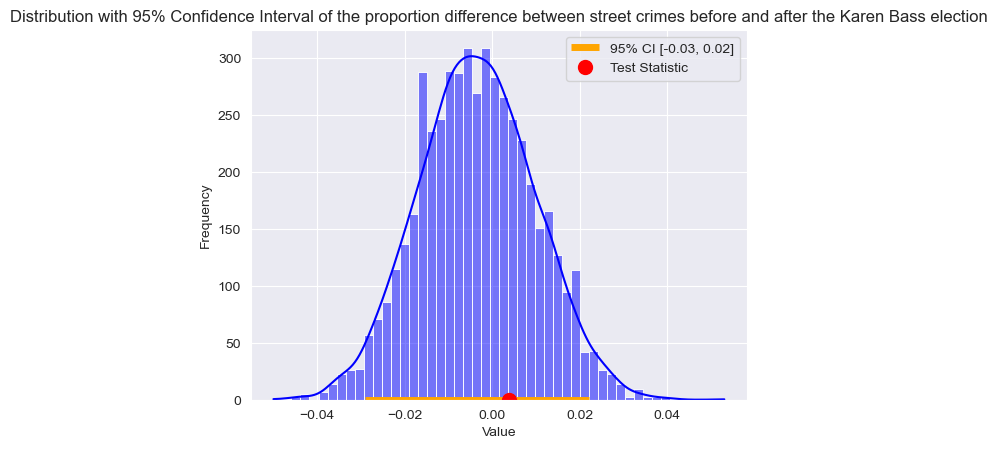

In [6]:
num_sims = 5000
proportions = []
sample_size = 10000

for i in range(num_sims):
    proportions.append(close_to_karen_prop(sample_before(sample_size)) - close_to_karen_prop(sample_after(sample_size)))
plot_distribution(proportions, 'the proportion difference between street crimes before and after the Karen Bass election')


The observed test statistic falls within the 95% confidence interval, so we do not reject the null hypothesis.

# Question 4 - Predictive model
I would like to predict the outcome of an investigation based on the data. <br>
Predicting the likely outcome of an investigation can be a valuable tool for lawyers, <br> 
providing them with insights into how a case might unfold based on historical data. <br>


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
crime_data

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,190326475,2020-01-03,21:30,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,O,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-08-02,18:00,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-04-11,17:00,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2020-10-03,20:37,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
5,231808869,2020-01-12,23:00,18,Southeast,1826,354,THEFT OF IDENTITY,1822 0100 0930 0929,41,M,H,SINGLE FAMILY DWELLING,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876463,231110961,2023-06-07,12:00,11,Northeast,1115,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1300,47,M,F,ELEMENTARY SCHOOL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,2000 MERTON AV,34.1381,-118.2115
876465,230115595,2023-08-07,12:30,1,Central,111,626,INTIMATE PARTNER - SIMPLE ASSAULT,0448 0913 1813 2000,35,M,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,800 BARTLETT ST,34.0626,-118.2445
876469,230115220,2023-01-07,00:01,1,Central,154,352,PICKPOCKET,1822 0344,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485
876470,230906458,2023-05-03,09:00,9,Van Nuys,914,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14500 HARTLAND ST,34.1951,-118.4487


predict the status description of the crime: Status - Target <br>
columns that can be used for the model: {'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd'} <br>


Nominal Categories - Vict sex, Vict Descent, Weapon Used Cd, Status Desc, AREA NAME, Crm Cd Desc. <br>
Ordinal Categories - Vict Age.

In [9]:
# Clean the data
crime_data1 = crime_data
# remove rows with 'Status Desc' = 'UNK'
crime_data1 = crime_data1[crime_data1['Status Desc'] != 'UNK']
crime_data1 = crime_data1[crime_data1['Vict Sex'] != 'H']
crime_data1 = crime_data1[crime_data1['Vict Age'] >= 0]
crime_data1 = crime_data1[crime_data1['Vict Descent'] != 'X']

In [10]:
# Categories status into 3 categories: Investigative Contact, Arrest, No Arrest.
# assuming that AO and JO relates to 'No Arrest' such as case closed, warning etc.
crime_data1['Arrest'] = crime_data1['Status'].map({
    'IC': 1,
    'AA': 2,
    'JA': 2,
    'AO': 0,
    'JO': 0
})



crime_data1

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,Arrest
0,190326475,2020-01-03,21:30,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,...,O,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,2
1,200106753,2020-08-02,18:00,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,...,O,BUS STOP/LAYOVER (ALSO QUERY 124),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,1
3,200907217,2020-10-03,20:37,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,...,O,CLOTHING STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,1
5,231808869,2020-01-12,23:00,18,Southeast,1826,354,THEFT OF IDENTITY,1822 0100 0930 0929,41,...,H,SINGLE FAMILY DWELLING,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,9900 COMPTON AV,33.9467,-118.2463,1
6,230110144,2020-03-07,09:00,1,Central,182,354,THEFT OF IDENTITY,0930 0929,25,...,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1100 S GRAND AV,34.0415,-118.2620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876463,231110961,2023-06-07,12:00,11,Northeast,1115,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1300,47,...,F,ELEMENTARY SCHOOL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,2000 MERTON AV,34.1381,-118.2115,1
876465,230115595,2023-08-07,12:30,1,Central,111,626,INTIMATE PARTNER - SIMPLE ASSAULT,0448 0913 1813 2000,35,...,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,800 BARTLETT ST,34.0626,-118.2445,0
876469,230115220,2023-01-07,00:01,1,Central,154,352,PICKPOCKET,1822 0344,24,...,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485,1
876470,230906458,2023-05-03,09:00,9,Van Nuys,914,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,...,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14500 HARTLAND ST,34.1951,-118.4487,1


In [11]:
crime_data1[['Weapon Desc', 'Weapon Used Cd']].value_counts()
crime_data1[['Crm Cd', 'Crm Cd Desc']].value_counts()

Crm Cd  Crm Cd Desc                                       
354     THEFT OF IDENTITY                                     33603
624     BATTERY - SIMPLE ASSAULT                              27214
330     BURGLARY FROM VEHICLE                                 20471
230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        19071
626     INTIMATE PARTNER - SIMPLE ASSAULT                     17103
                                                              ...  
904     FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        2
475     THEFT, COIN MACHINE - ATTEMPT                             1
432     BLOCKING DOOR INDUCTION CENTER                            1
349     GRAND THEFT / AUTO REPAIR                                 1
882     INCITING A RIOT                                           1
Name: count, Length: 134, dtype: int64

In [12]:
# Create a dictionary to map weapon descriptions to categories
weapon_order = {
    # Group 1: Unknown weapons
    'UNKNOWN WEAPON/OTHER WEAPON': 0,
    
    # Group 2: Verbal threats
    'VERBAL THREAT': 1,
    'DEMAND NOTE': 1,
    
    # Group 3: Non-lethal or less-lethal (hands, bodily force, etc.)
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 2,
    'PHYSICAL PRESENCE': 2,
     'MACE/PEPPER SPRAY': 2,
    
    # Group 4: Blunt weapons
    'PIPE/METAL PIPE': 3,
    'ROCK/THROWN OBJECT': 3,
    'STICK': 3,
    'CLUB/BAT': 3,
    'HAMMER': 3,
    'BRASS KNUCKLES': 3,
    'TIRE IRON': 3,
    'SYRINGE': 3,
    
    # Group 5: Knives and cutting instruments
    'UNKNOWN TYPE CUTTING INSTRUMENT': 4,
    'KNIFE WITH BLADE 6INCHES OR LESS': 4,
    'FOLDING KNIFE': 4,
    'KITCHEN KNIFE': 4,
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 4,
    'OTHER KNIFE': 4,
    'MACHETE': 4,
    'DIRK/DAGGER': 4,
    'ICE PICK': 4,
    'CLEAVER': 4,
    'RAZOR': 4,
    'STRAIGHT RAZOR': 4,
    'SWITCH BLADE': 4,
    'SCISSORS': 4,
    'SWORD': 4,
    'AXE': 4,
    'BOWIE KNIFE': 4,
    'BOW AND ARROW': 4,
    
    # Group 6: Firearms
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 3,
    'UNKNOWN FIREARM': 5,
    'HAND GUN': 5,
    'REVOLVER': 5,
    'SEMI-AUTOMATIC PISTOL': 5,
    'SEMI-AUTOMATIC RIFLE': 5,
    'RIFLE': 5,
    'SHOTGUN': 5,
    'ASSAULT WEAPON/UZI/AK47/ETC': 5,
    'UZI SEMIAUTOMATIC ASSAULT RIFLE': 5,
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 5,
    'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE': 5,
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 5,
    'SAWED OFF RIFLE/SHOTGUN': 5,
    
    # Group 7: Other lethal weapons
    'FIRE': 6,
    'EXPLOXIVE DEVICE': 6,
    
    # animals
    'DOG/ANIMAL (SIC ANIMAL ON)': 7
}

# Assuming 'Weapon Desc' is the column with the weapon descriptions
crime_data1['Weapon Desc Ordered'] = crime_data1['Weapon Desc'].replace(weapon_order)

In [13]:
top_40_crime_codes = [354,624,330,230,626,740,440,310,331,341,210,745,930,420,761,236,901,888,956,442,480,900,662,946,860,220,121,625,350,627,520,352,320,649,903,812,940,664,343,648]
crime_data1 = crime_data1[crime_data1['Crm Cd'].isin(top_40_crime_codes)]


In [15]:
# Feature engineering
# Nominal Categories
#crime_data2 = pd.get_dummies(crime_data1, columns=['Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Arrest', 'AREA', 'Crm Cd'], drop_first=True)
crime_data2 = crime_data1.drop(columns=['DR_NO','DATE OCC', 'TIME OCC', 'AREA NAME', 'Rpt Dist No','Crm Cd Desc', 'Mocodes', 'Weapon Used Cd', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'Status Desc', 'LOCATION', 'LAT', 'LON'])

crime_data2 

,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Arrest,Weapon Desc Ordered
1,1,330,47,M,O,1,0
3,9,343,19,M,O,1,0
5,18,354,41,M,H,1,0
6,1,354,25,M,H,1,0
7,3,354,27,F,B,1,0
...,...,...,...,...,...,...,...
876463,11,745,47,M,F,1,0
876465,1,626,35,M,W,0,2
876469,1,352,24,F,H,1,0
876470,9,745,53,F,H,1,0


In [20]:
crime_data2 = pd.get_dummies(crime_data2, columns=['AREA', 'Crm Cd', 'Vict Sex', 'Vict Descent', 'Weapon Desc Ordered'], drop_first=True)
crime_data2

,Vict Age,Arrest,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,AREA_7,AREA_8,AREA_9,...,Weapon Desc Ordered_RELIC FIREARM,Weapon Desc Ordered_ROPE/LIGATURE,Weapon Desc Ordered_SCALDING LIQUID,Weapon Desc Ordered_SCREWDRIVER,Weapon Desc Ordered_SIMULATED GUN,Weapon Desc Ordered_STARTER PISTOL/REVOLVER,Weapon Desc Ordered_STUN GUN,Weapon Desc Ordered_TOY GUN,Weapon Desc Ordered_UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE,Weapon Desc Ordered_VEHICLE
1,47,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,41,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,25,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,27,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876463,47,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876465,35,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876469,24,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876470,53,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [21]:
X = crime_data2.drop(columns=['Arrest'])  # features
Y = crime_data2['Arrest']  # labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
k_avg_score = cv_scores.mean()
k_avg_score

0.7531248415277593

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=7)
cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
k_avg_score = cv_scores.mean()
k_avg_score

0.7761948448711162

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=21)
cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
k_avg_score = cv_scores.mean()
k_avg_score

0.7880745982007228

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=51)
cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
k_avg_score = cv_scores.mean()
k_avg_score

0.7903713506051615

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=101)
cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
k_avg_score = cv_scores.mean()
k_avg_score

0.7898635526301304

After trying different values of K yuristically, the best model is with K=51. <br>
with almost 80% accuracy on the training set for predicting likelyhood of crime to lead for arrest, continue investigation or no arrest. <br>
This tool can help lawyer to predict which case can be more benefitial for them based on historical data that available to everyone